# Detection

In [11]:
#test on video
import os
import cv2
import numpy as np
import tensorflow as tf
import sys
sys.path.append("..")
from utils import label_map_util
from utils import visualization_utils as vis_util
import json

jtxt={}
jtxt["hand steepling"] = []
jtxt["modified steepling"]= []
jtxt["finger pointing"]= []


MODEL_NAME = 'inference_graph'
VIDEO_NAME = '2400_1.mp4'

# Grab path to current working directory
CWD_PATH = os.getcwd()

# Path to frozen detection graph .pb file, which contains the model that is used
# for object detection.
PATH_TO_CKPT = os.path.join(CWD_PATH,MODEL_NAME,'frozen_inference_graph.pb')

# Path to label map file
PATH_TO_LABELS = os.path.join(CWD_PATH,'training','labelmap.pbtxt')

# Path to video
PATH_TO_VIDEO = os.path.join(CWD_PATH,VIDEO_NAME)

# Number of classes the object detector can identify
NUM_CLASSES = 3

# Load the label map.
# Label maps map indices to category names, so that when our convolution
# network predicts `5`, we know that this corresponds to `king`.
# Here we use internal utility functions, but anything that returns a
# dictionary mapping integers to appropriate string labels would be fine
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

# Load the Tensorflow model into memory.
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

    sess = tf.Session(graph=detection_graph)

# Define input and output tensors (i.e. data) for the object detection classifier

# Input tensor is the image
image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')

# Output tensors are the detection boxes, scores, and classes
# Each box represents a part of the image where a particular object was detected
detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')

# Each score represents level of confidence for each of the objects.
# The score is shown on the result image, together with the class label.
detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')

# Number of objects detected
num_detections = detection_graph.get_tensor_by_name('num_detections:0')


# Open video file
video = cv2.VideoCapture(PATH_TO_VIDEO)

while(video.isOpened()):

    # Acquire frame and expand frame dimensions to have shape: [1, None, None, 3]
    # i.e. a single-column array, where each item in the column has the pixel RGB value
    ret, frame = video.read()
    if not ret:
        break
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame_expanded = np.expand_dims(frame_rgb, axis=0)

    # Perform the actual detection by running the model with the image as input
    (boxes, scores, classes, num) = sess.run(
        [detection_boxes, detection_scores, detection_classes, num_detections],
        feed_dict={image_tensor: frame_expanded})

    # Draw the results of the detection (aka 'visulaize the results')
    vis_util.visualize_boxes_and_labels_on_image_array(
        frame,
        np.squeeze(boxes),
        np.squeeze(classes).astype(np.int32),
        np.squeeze(scores),
        category_index,
        use_normalized_coordinates=True,
        line_thickness=8,
        min_score_thresh=0.60)

    # All the results have been drawn on the frame, so it's time to display it.
    cv2.imshow('Object detector', frame)
    
    #json record
    time=video.get(cv2.CAP_PROP_POS_MSEC)
    time=time/1000
    #class== 1 for hand steepling，2 for modified steepling，3 for finger pointing
    firstclass1=np.where(classes==1)
    prob1=scores[firstclass1[0][0]][firstclass1[1][0]]
    firstclass2=np.where(classes==2)
    prob2=scores[firstclass2[0][0]][firstclass2[1][0]]
    firstclass3=np.where(classes==3)
    prob3=scores[firstclass3[0][0]][firstclass3[1][0]]
    print(time ,prob1,prob2,prob3)
    jtxt["hand steepling"].append([time, prob1.tolist()])
    jtxt["modified steepling"].append([time, prob2.tolist()])
    jtxt["finger pointing"].append([time, prob3.tolist()])
    # Press 'q' to quit
    if cv2.waitKey(1) == ord('q'):
        break

# Clean up
video.release()
cv2.destroyAllWindows()
#json wirte
with open(str(VIDEO_NAME)+'.json','w') as f:
    json.dump(jtxt,f)

0.0 2.6576996e-05 3.176049e-06 0.0011699336
0.03333333333333333 2.8200779e-05 2.4121635e-05 0.009260437
0.06666666666666667 2.7931503e-05 2.4443209e-05 0.009107828
0.1 3.1575644e-05 2.4361076e-05 0.010066907
0.13333333333333333 0.0008363332 1.49754305e-05 0.006308931
0.16666666666666666 0.0002712194 0.00022169831 0.06881048
0.2 0.00023848108 0.00019125559 0.077662386
0.23333333333333334 0.00026826674 0.00023068237 0.12089676
0.26666666666666666 0.00032383576 0.003965615 0.12871264
0.3 0.00022199728 0.00025151783 0.068863526
0.3333333333333333 0.0003501519 5.2454787e-05 0.03554071
0.36666666666666664 0.0010003014 7.865411e-05 0.038039632
0.4 0.0021425916 7.2390336e-05 0.03341841
0.43333333333333335 0.00031936294 2.8922843e-05 0.010083212
0.4666666666666667 0.004080551 3.169755e-05 0.0021180187
0.5 0.024973804 0.00012154324 0.00045527628
0.5333333333333333 0.049939804 7.415922e-05 0.0001708544
0.5666666666666667 0.07186646 9.4331874e-05 0.0001992162
0.6 0.08175971 9.917813e-05 0.00010387

5.533333333333333 0.43021846 0.00053775177 0.00060643937
5.566666666666666 0.42356148 0.0005276274 0.00059637654
5.6 0.4008234 0.0004957924 0.0005664677
5.633333333333333 0.37424415 0.00046150817 0.0005362623
5.666666666666667 0.41998968 0.000521759 0.0005933859
5.7 0.3496044 0.00045950702 0.00056522596
5.733333333333333 0.4190454 0.0005212684 0.00059398054
5.766666666666667 0.46029264 0.00057718134 0.0006449463


In [2]:
#test on webcam
import os
import cv2
import numpy as np
import tensorflow as tf
import sys
sys.path.append("..")
from utils import label_map_util
from utils import visualization_utils as vis_util

# Name of the directory containing the object detection module we're using
MODEL_NAME = 'inference_graph'

# Grab path to current working directory
CWD_PATH = os.getcwd()

# Path to frozen detection graph .pb file, which contains the model that is used
# for object detection.
PATH_TO_CKPT = os.path.join(CWD_PATH,MODEL_NAME,'frozen_inference_graph.pb')

# Path to label map file
PATH_TO_LABELS = os.path.join(CWD_PATH,'training','labelmap.pbtxt')

# Number of classes the object detector can identify
NUM_CLASSES = 3

## Load the label map.
# Label maps map indices to category names, so that when our convolution
# network predicts `5`, we know that this corresponds to `king`.
# Here we use internal utility functions, but anything that returns a
# dictionary mapping integers to appropriate string labels would be fine
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

# Load the Tensorflow model into memory.
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

    sess = tf.Session(graph=detection_graph)


# Define input and output tensors (i.e. data) for the object detection classifier

# Input tensor is the image
image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')

# Output tensors are the detection boxes, scores, and classes
# Each box represents a part of the image where a particular object was detected
detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')

# Each score represents level of confidence for each of the objects.
# The score is shown on the result image, together with the class label.
detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')

# Number of objects detected
num_detections = detection_graph.get_tensor_by_name('num_detections:0')

# Initialize webcam feed
video = cv2.VideoCapture(0)
ret = video.set(3,1280)
ret = video.set(4,720)

while(True):

    # Acquire frame and expand frame dimensions to have shape: [1, None, None, 3]
    # i.e. a single-column array, where each item in the column has the pixel RGB value
    ret, frame = video.read()
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame_expanded = np.expand_dims(frame_rgb, axis=0)

    # Perform the actual detection by running the model with the image as input
    (boxes, scores, classes, num) = sess.run(
        [detection_boxes, detection_scores, detection_classes, num_detections],
        feed_dict={image_tensor: frame_expanded})

    # Draw the results of the detection (aka 'visulaize the results')
    vis_util.visualize_boxes_and_labels_on_image_array(
        frame,
        np.squeeze(boxes),
        np.squeeze(classes).astype(np.int32),
        np.squeeze(scores),
        category_index,
        use_normalized_coordinates=True,
        line_thickness=8,
        min_score_thresh=0.60)

    # All the results have been drawn on the frame, so it's time to display it.
    cv2.imshow('Object detector', frame)

    # Press 'q' to quit
    if cv2.waitKey(1) == ord('q'):
        break

# Clean up
video.release()
cv2.destroyAllWindows()



([<matplotlib.axis.YTick at 0x1616cc5d5c0>,
 <a list of 11 Text major ticklabel objects>)

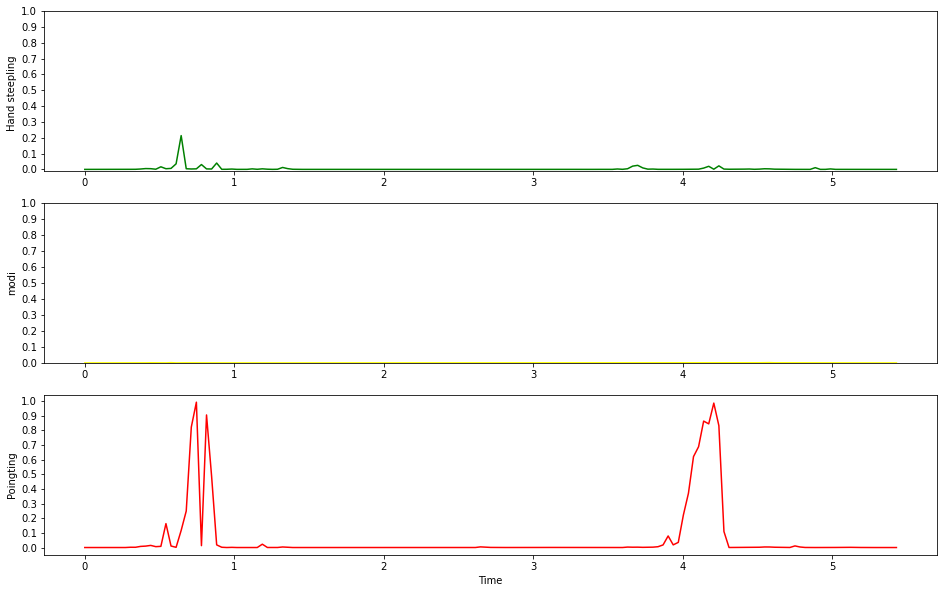

In [16]:
from pylab import *
import json
import cv2
filename='3100_1'
with open(str(filename)+".mp4.json",'r') as load_f:
    load_dict = json.load(load_f)
a=np.array(load_dict['hand steepling'])
b=np.array(load_dict['modified steepling'])
c=np.array(load_dict['finger pointing'])
t=a[:,0]
phs=a[:,1]
pms=b[:,1]
pfp=c[:,1]
#plt.title(str(filename), fontsize=24) 
fig = plt.figure(figsize=(16, 10))
plt.subplot(311)
plt.plot(t,phs,color='green')
plt.ylabel("Hand steepling ")
plt.yticks(np.linspace(0,1,11))


plt.subplot(312)
plt.plot(t,pms,color='yellow')
plt.ylabel("modi")
plt.yticks(np.linspace(0,1,11))

plt.subplot(313)
plt.plot(t,pfp,color='red')
plt.xlabel("Time")
plt.ylabel("Poingting")
plt.yticks(np.linspace(0,1,11))


In [ ]:

with open("../config/record.json","w") as dump_f:
  json.dump(load_dict,dump_f)